In [1]:
# best parameters are identified using grid search with cross validation

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import os
os.chdir("C:\Digital Nest\Decision Trees")
print (os.getcwd())

C:\Digital Nest\Decision Trees


In [2]:
churn = pd.read_csv('Churn.csv')
churn.head()

,AccountLength,VMailMessage,DayMins,EveMins,NightMins,IntlMins,CustServCalls,Churn,IntlPlan,VMailPlan,...,DayCharge,EveCalls,EveCharge,NightCalls,NightCharge,IntlCalls,IntlCharge,State,AreaCode,Phone
0,128,25,265.1,197.4,244.7,10.0,1,0,0,1,...,45.07,99,16.78,91,11.01,3,2.70,KS,415,382-4657
1,107,26,161.6,195.5,254.4,13.7,1,0,0,1,...,27.47,103,16.62,103,11.45,3,3.70,OH,415,371-7191
2,137,0,243.4,121.2,162.6,12.2,0,0,0,0,...,41.38,110,10.30,104,7.32,5,3.29,NJ,415,358-1921
3,84,0,299.4,61.9,196.9,6.6,2,0,1,0,...,50.90,88,5.26,89,8.86,7,1.78,OH,408,375-9999
4,75,0,166.7,148.3,186.9,10.1,3,0,1,0,...,28.34,122,12.61,121,8.41,3,2.73,OK,415,330-6626


In [3]:
churn.describe()

,AccountLength,VMailMessage,DayMins,EveMins,NightMins,IntlMins,CustServCalls,Churn,IntlPlan,VMailPlan,DayCalls,DayCharge,EveCalls,EveCharge,NightCalls,NightCharge,IntlCalls,IntlCharge,AreaCode
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,8.099010,179.775098,200.980348,200.872037,10.237294,1.562856,0.144914,0.096910,0.276628,100.435644,30.562307,100.114311,17.083540,100.107711,9.039325,4.479448,2.764581,437.182418
std,39.822106,13.688365,54.467389,50.713844,50.573847,2.791840,1.315491,0.352067,0.295879,0.447398,20.069084,9.259435,19.922625,4.310668,19.568609,2.275873,2.461214,0.753773,42.371290
min,1.000000,0.000000,0.000000,0.000000,23.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,33.000000,1.040000,0.000000,0.000000,408.000000
25%,74.000000,0.000000,143.700000,166.600000,167.000000,8.500000,1.000000,0.000000,0.000000,0.000000,87.000000,24.430000,87.000000,14.160000,87.000000,7.520000,3.000000,2.300000,408.000000
50%,101.000000,0.000000,179.400000,201.400000,201.200000,10.300000,1.000000,0.000000,0.000000,0.000000,101.000000,30.500000,100.000000,17.120000,100.000000,9.050000,4.000000,2.780000,415.000000
75%,127.000000,20.000000,216.400000,235.300000,235.300000,12.100000,2.000000,0.000000,0.000000,1.000000,114.000000,36.790000,114.000000,20.000000,113.000000,10.590000,6.000000,3.270000,510.000000
max,243.000000,51.000000,350.800000,363.700000,395.000000,20.000000,9.000000,1.000000,1.000000,1.000000,165.000000,59.640000,170.000000,30.910000,175.000000,17.770000,20.000000,5.400000,510.000000


In [4]:
np.histogram(churn.AccountLength,bins=21)

(array([ 34,  60,  74, 134, 174, 273, 298, 386, 355, 384, 335, 280, 190,
        145,  85,  64,  31,  14,  10,   5,   2], dtype=int64),
 array([  1.        ,  12.52380952,  24.04761905,  35.57142857,
         47.0952381 ,  58.61904762,  70.14285714,  81.66666667,
         93.19047619, 104.71428571, 116.23809524, 127.76190476,
        139.28571429, 150.80952381, 162.33333333, 173.85714286,
        185.38095238, 196.9047619 , 208.42857143, 219.95238095,
        231.47619048, 243.        ]))

In [34]:
# target class ratio
np.unique(churn.Churn,return_counts=True)

(array([0, 1], dtype=int64), array([2850,  483], dtype=int64))

In [35]:
2850/(2850+483)

0.8550855085508551

In [36]:
churn.columns.values

array(['AccountLength', 'VMailMessage', 'DayMins', 'EveMins', 'NightMins',
       'IntlMins', 'CustServCalls', 'Churn', 'IntlPlan', 'VMailPlan',
       'DayCalls', 'DayCharge', 'EveCalls', 'EveCharge', 'NightCalls',
       'NightCharge', 'IntlCalls', 'IntlCharge', 'State', 'AreaCode',
       'Phone'], dtype=object)

In [37]:
# check if any NA values
churn.isnull().values.any()

False

In [38]:
# split the file into Independent and dependent variables
churnY = pd.DataFrame(churn,columns=["Churn"])
print(churnY.shape)
churnX = churn.copy()
churnX.drop(columns=['Churn','Phone'],axis=1,inplace=True)
print(churnX.shape)

(3333, 1)
(3333, 19)


In [39]:
# splitting the data into Train and Test
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(churnX, churnY, 
                                                    test_size = 0.20, 
                                                    random_state = 0)
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(2666, 19)
(2666, 1)
(667, 19)
(667, 1)


In [40]:
Counter(churn.AreaCode)

Counter({415: 1655, 408: 838, 510: 840})

In [42]:
print(Counter(churn.State,return_counts=True))

Counter({'WV': 106, 'MN': 84, 'NY': 83, 'AL': 80, 'OH': 78, 'WI': 78, 'OR': 78, 'VA': 77, 'WY': 77, 'CT': 74, 'ID': 73, 'VT': 73, 'MI': 73, 'TX': 72, 'UT': 72, 'IN': 71, 'KS': 70, 'MD': 70, 'NJ': 68, 'MT': 68, 'NC': 68, 'CO': 66, 'WA': 66, 'NV': 66, 'MA': 65, 'RI': 65, 'MS': 65, 'AZ': 64, 'MO': 63, 'FL': 63, 'NM': 62, 'ME': 62, 'ND': 62, 'OK': 61, 'NE': 61, 'DE': 61, 'SC': 60, 'SD': 60, 'KY': 59, 'IL': 58, 'NH': 56, 'AR': 55, 'GA': 54, 'DC': 54, 'HI': 53, 'TN': 53, 'AK': 52, 'LA': 51, 'PA': 45, 'IA': 44, 'CA': 34, 'return_counts': 1})


In [43]:
# lable encoding for strings - state
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X_train.State = le.fit_transform(X_train.State)
X_test.State = le.transform(X_test.State)
print(Counter(X_train.State))

Counter({49: 82, 23: 69, 50: 66, 34: 63, 1: 63, 37: 62, 16: 62, 35: 62, 48: 62, 45: 62, 26: 60, 22: 59, 6: 59, 13: 58, 44: 55, 19: 54, 27: 54, 47: 54, 29: 53, 46: 52, 8: 52, 36: 52, 31: 51, 32: 51, 25: 51, 15: 51, 24: 51, 9: 51, 33: 50, 20: 50, 39: 50, 43: 50, 21: 50, 5: 49, 40: 49, 41: 48, 28: 48, 3: 48, 30: 48, 10: 47, 2: 47, 14: 46, 17: 45, 11: 45, 0: 45, 42: 44, 7: 43, 18: 41, 12: 38, 38: 37, 4: 27})


C:\Users\Vishnu Murthy Chakka\Anaconda3\lib\site-packages\pandas\core\generic.py:5292: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [44]:
X_train.shape

(2666, 19)

In [45]:
# split the Train data into Categorical and non-categorical
catcols = ['State', 'AreaCode']
X_train_cat = pd.DataFrame(X_train, columns=catcols)
print(X_train_cat.shape)
X_train_cont = X_train.copy()
X_train_cont.drop(columns=['State', 'AreaCode'],axis=1,inplace=True)
print(X_train_cont.shape)
X_train_cont.reset_index(drop=True,inplace=True)

(2666, 2)
(2666, 17)


In [46]:
# split the Test data into Categorical and non-categorical
X_test_cat = pd.DataFrame(X_test, columns=catcols)
print(X_test_cat.shape)
X_test_cont = X_test.copy()
print(X_test_cont.columns)
X_test_cont.drop(columns=['State', 'AreaCode'],axis=1,inplace=True)
print(X_test_cont.shape)
X_test_cont.reset_index(drop=True,inplace=True)

(667, 2)
Index(['AccountLength', 'VMailMessage', 'DayMins', 'EveMins', 'NightMins',
       'IntlMins', 'CustServCalls', 'IntlPlan', 'VMailPlan', 'DayCalls',
       'DayCharge', 'EveCalls', 'EveCharge', 'NightCalls', 'NightCharge',
       'IntlCalls', 'IntlCharge', 'State', 'AreaCode'],
      dtype='object')
(667, 17)


In [47]:
# apply one hot encoding on state and area
from sklearn.preprocessing import OneHotEncoder
OHE = OneHotEncoder(sparse = False, handle_unknown = 'error')
X_train_cat2 = OHE.fit_transform(X_train_cat)
print(X_train_cat2.shape)
X_test_cat2 = OHE.transform(X_test_cat)
print(X_test_cat2.shape)

(2666, 54)
(667, 54)


In [48]:
# convert back array into data frame
X_train_cat3 = pd.DataFrame(X_train_cat2)
print(X_train_cat3.shape)
X_test_cat3 = pd.DataFrame(X_test_cat2)
print(X_test_cat3.shape)

(2666, 54)
(667, 54)


In [49]:
# merge continuous and onehotencoded categorical data
X_train_final = pd.concat([X_train_cont,X_train_cat3],axis=1,join='outer',ignore_index=False)
X_test_final = pd.concat([X_test_cont,X_test_cat3],axis=1,join='outer',ignore_index=False)
print(X_train_final.shape)
print(X_test_final.shape)

(2666, 71)
(667, 71)


In [50]:
#include mingw64 path for xgboost
import os
mingw_path = 'C:/Program Files/mingw-w64/x86_64-8.1.0-posix-seh-rt_v6-rev0/mingw64/bin'
os.environ['PATH'] = mingw_path + ';' + os.environ['PATH']
#print(os.environ['PATH'])

In [51]:
# check the parameter list from 
# https://xgboost.readthedocs.io/en/latest/parameter.html#parameters-for-tree-booster
# https://xgboost.readthedocs.io/en/latest/python/python_api.html

# create xgbClassifier object
from xgboost import XGBClassifier
XGB = XGBClassifier(booster='gbtree',  
                        objective='binary:logistic',verbosity=1)
# A parameter grid for XGBoost
parms = {'max_depth': [2,3,4],
        'n_estimators': [5, 8, 12],
        'subsample': [0.1,0.5,0.9],        # sampling of rows 
        'learning_rate': [0.1, 0.5, 0.7]   # shrinkage rate or learning rate 
        }

from sklearn.model_selection import GridSearchCV
CV = GridSearchCV(estimator = XGB,param_grid = parms, 
                  scoring = 'f1_macro',cv=3,refit=True,
                 return_train_score = True,verbose=10,n_jobs=1)
CV.fit(X_train_final,Y_train.Churn)

Fitting 3 folds for each of 81 candidates, totalling 243 fits
[CV] learning_rate=0.1, max_depth=2, n_estimators=5, subsample=0.1 ...
[CV]  learning_rate=0.1, max_depth=2, n_estimators=5, subsample=0.1, score=(train=0.626, test=0.645), total=   0.0s
[CV] learning_rate=0.1, max_depth=2, n_estimators=5, subsample=0.1 ...
[CV]  learning_rate=0.1, max_depth=2, n_estimators=5, subsample=0.1, score=(train=0.621, test=0.631), total=   0.0s
[CV] learning_rate=0.1, max_depth=2, n_estimators=5, subsample=0.1 ...
[CV]  learning_rate=0.1, max_depth=2, n_estimators=5, subsample=0.1, score=(train=0.646, test=0.613), total=   0.0s
[CV] learning_rate=0.1, max_depth=2, n_estimators=5, subsample=0.5 ...
[CV]  learning_rate=0.1, max_depth=2, n_estimators=5, subsample=0.5, score=(train=0.753, test=0.753), total=   0.0s
[CV] learning_rate=0.1, max_depth=2, n_estimators=5, subsample=0.5 ...


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.1s remaining:    0.0s


[CV]  learning_rate=0.1, max_depth=2, n_estimators=5, subsample=0.5, score=(train=0.740, test=0.708), total=   0.1s
[CV] learning_rate=0.1, max_depth=2, n_estimators=5, subsample=0.5 ...
[CV]  learning_rate=0.1, max_depth=2, n_estimators=5, subsample=0.5, score=(train=0.686, test=0.657), total=   0.0s
[CV] learning_rate=0.1, max_depth=2, n_estimators=5, subsample=0.9 ...
[CV]  learning_rate=0.1, max_depth=2, n_estimators=5, subsample=0.9, score=(train=0.749, test=0.762), total=   0.0s
[CV] learning_rate=0.1, max_depth=2, n_estimators=5, subsample=0.9 ...
[CV]  learning_rate=0.1, max_depth=2, n_estimators=5, subsample=0.9, score=(train=0.755, test=0.742), total=   0.0s
[CV] learning_rate=0.1, max_depth=2, n_estimators=5, subsample=0.9 ...
[CV]  learning_rate=0.1, max_depth=2, n_estimators=5, subsample=0.9, score=(train=0.694, test=0.682), total=   0.0s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.3s remaining:    0.0s


[CV] learning_rate=0.1, max_depth=2, n_estimators=8, subsample=0.1 ...
[CV]  learning_rate=0.1, max_depth=2, n_estimators=8, subsample=0.1, score=(train=0.665, test=0.677), total=   0.0s
[CV] learning_rate=0.1, max_depth=2, n_estimators=8, subsample=0.1 ...
[CV]  learning_rate=0.1, max_depth=2, n_estimators=8, subsample=0.1, score=(train=0.601, test=0.589), total=   0.0s
[CV] learning_rate=0.1, max_depth=2, n_estimators=8, subsample=0.1 ...
[CV]  learning_rate=0.1, max_depth=2, n_estimators=8, subsample=0.1, score=(train=0.702, test=0.657), total=   0.0s
[CV] learning_rate=0.1, max_depth=2, n_estimators=8, subsample=0.5 ...
[CV]  learning_rate=0.1, max_depth=2, n_estimators=8, subsample=0.5, score=(train=0.760, test=0.753), total=   0.1s
[CV] learning_rate=0.1, max_depth=2, n_estimators=8, subsample=0.5 ...
[CV]  learning_rate=0.1, max_depth=2, n_estimators=8, subsample=0.5, score=(train=0.702, test=0.659), total=   0.1s
[CV] learning_rate=0.1, max_depth=2, n_estimators=8, subsample=0.

[CV]  learning_rate=0.1, max_depth=4, n_estimators=5, subsample=0.1, score=(train=0.751, test=0.704), total=   0.1s
[CV] learning_rate=0.1, max_depth=4, n_estimators=5, subsample=0.1 ...
[CV]  learning_rate=0.1, max_depth=4, n_estimators=5, subsample=0.1, score=(train=0.753, test=0.692), total=   0.0s
[CV] learning_rate=0.1, max_depth=4, n_estimators=5, subsample=0.5 ...
[CV]  learning_rate=0.1, max_depth=4, n_estimators=5, subsample=0.5, score=(train=0.857, test=0.815), total=   0.1s
[CV] learning_rate=0.1, max_depth=4, n_estimators=5, subsample=0.5 ...
[CV]  learning_rate=0.1, max_depth=4, n_estimators=5, subsample=0.5, score=(train=0.855, test=0.779), total=   0.1s
[CV] learning_rate=0.1, max_depth=4, n_estimators=5, subsample=0.5 ...
[CV]  learning_rate=0.1, max_depth=4, n_estimators=5, subsample=0.5, score=(train=0.878, test=0.824), total=   0.1s
[CV] learning_rate=0.1, max_depth=4, n_estimators=5, subsample=0.9 ...
[CV]  learning_rate=0.1, max_depth=4, n_estimators=5, subsample=0

[CV]  learning_rate=0.5, max_depth=2, n_estimators=12, subsample=0.1, score=(train=0.779, test=0.722), total=   0.1s
[CV] learning_rate=0.5, max_depth=2, n_estimators=12, subsample=0.5 ..
[CV]  learning_rate=0.5, max_depth=2, n_estimators=12, subsample=0.5, score=(train=0.841, test=0.821), total=   0.1s
[CV] learning_rate=0.5, max_depth=2, n_estimators=12, subsample=0.5 ..
[CV]  learning_rate=0.5, max_depth=2, n_estimators=12, subsample=0.5, score=(train=0.837, test=0.826), total=   0.1s
[CV] learning_rate=0.5, max_depth=2, n_estimators=12, subsample=0.5 ..
[CV]  learning_rate=0.5, max_depth=2, n_estimators=12, subsample=0.5, score=(train=0.859, test=0.784), total=   0.1s
[CV] learning_rate=0.5, max_depth=2, n_estimators=12, subsample=0.9 ..
[CV]  learning_rate=0.5, max_depth=2, n_estimators=12, subsample=0.9, score=(train=0.841, test=0.796), total=   0.1s
[CV] learning_rate=0.5, max_depth=2, n_estimators=12, subsample=0.9 ..
[CV]  learning_rate=0.5, max_depth=2, n_estimators=12, subsa

[CV]  learning_rate=0.5, max_depth=4, n_estimators=8, subsample=0.1, score=(train=0.741, test=0.722), total=   0.1s
[CV] learning_rate=0.5, max_depth=4, n_estimators=8, subsample=0.1 ...
[CV]  learning_rate=0.5, max_depth=4, n_estimators=8, subsample=0.1, score=(train=0.791, test=0.755), total=   0.1s
[CV] learning_rate=0.5, max_depth=4, n_estimators=8, subsample=0.5 ...
[CV]  learning_rate=0.5, max_depth=4, n_estimators=8, subsample=0.5, score=(train=0.921, test=0.884), total=   0.1s
[CV] learning_rate=0.5, max_depth=4, n_estimators=8, subsample=0.5 ...
[CV]  learning_rate=0.5, max_depth=4, n_estimators=8, subsample=0.5, score=(train=0.913, test=0.852), total=   0.1s
[CV] learning_rate=0.5, max_depth=4, n_estimators=8, subsample=0.5 ...
[CV]  learning_rate=0.5, max_depth=4, n_estimators=8, subsample=0.5, score=(train=0.927, test=0.885), total=   0.1s
[CV] learning_rate=0.5, max_depth=4, n_estimators=8, subsample=0.9 ...
[CV]  learning_rate=0.5, max_depth=4, n_estimators=8, subsample=0

[CV] learning_rate=0.7, max_depth=3, n_estimators=5, subsample=0.1 ...
[CV]  learning_rate=0.7, max_depth=3, n_estimators=5, subsample=0.1, score=(train=0.761, test=0.738), total=   0.0s
[CV] learning_rate=0.7, max_depth=3, n_estimators=5, subsample=0.1 ...
[CV]  learning_rate=0.7, max_depth=3, n_estimators=5, subsample=0.1, score=(train=0.731, test=0.726), total=   0.1s
[CV] learning_rate=0.7, max_depth=3, n_estimators=5, subsample=0.5 ...
[CV]  learning_rate=0.7, max_depth=3, n_estimators=5, subsample=0.5, score=(train=0.858, test=0.828), total=   0.0s
[CV] learning_rate=0.7, max_depth=3, n_estimators=5, subsample=0.5 ...
[CV]  learning_rate=0.7, max_depth=3, n_estimators=5, subsample=0.5, score=(train=0.881, test=0.874), total=   0.0s
[CV] learning_rate=0.7, max_depth=3, n_estimators=5, subsample=0.5 ...
[CV]  learning_rate=0.7, max_depth=3, n_estimators=5, subsample=0.5, score=(train=0.876, test=0.842), total=   0.1s
[CV] learning_rate=0.7, max_depth=3, n_estimators=5, subsample=0.

[CV]  learning_rate=0.7, max_depth=4, n_estimators=12, subsample=0.1, score=(train=0.776, test=0.702), total=   0.1s
[CV] learning_rate=0.7, max_depth=4, n_estimators=12, subsample=0.1 ..
[CV]  learning_rate=0.7, max_depth=4, n_estimators=12, subsample=0.1, score=(train=0.737, test=0.689), total=   0.1s
[CV] learning_rate=0.7, max_depth=4, n_estimators=12, subsample=0.1 ..
[CV]  learning_rate=0.7, max_depth=4, n_estimators=12, subsample=0.1, score=(train=0.764, test=0.759), total=   0.1s
[CV] learning_rate=0.7, max_depth=4, n_estimators=12, subsample=0.5 ..
[CV]  learning_rate=0.7, max_depth=4, n_estimators=12, subsample=0.5, score=(train=0.934, test=0.830), total=   0.1s
[CV] learning_rate=0.7, max_depth=4, n_estimators=12, subsample=0.5 ..
[CV]  learning_rate=0.7, max_depth=4, n_estimators=12, subsample=0.5, score=(train=0.942, test=0.862), total=   0.1s
[CV] learning_rate=0.7, max_depth=4, n_estimators=12, subsample=0.5 ..
[CV]  learning_rate=0.7, max_depth=4, n_estimators=12, subsa

[Parallel(n_jobs=1)]: Done 243 out of 243 | elapsed:   19.9s finished


GridSearchCV(cv=3, error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bytree=1,
                                     gamma=0, learning_rate=0.1,
                                     max_delta_step=0, max_depth=3,
                                     min_child_weight=1, missing=None,
                                     n_estimators=100, n_jobs=1, nthread=None,
                                     objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=True,
                                     subsample=1, verbosity=1),
             iid='deprecated', n_jobs=1,
             param_grid={'learning_rate': [0.1, 0.5, 0.7],
                         'max_depth': [2, 3, 4], 'n_estimators': [5, 8, 12],
                         'subsample': [0.1, 0.5, 0.9]},
        

In [52]:
# analyse CV results
CVResults = pd.DataFrame(CV.cv_results_)
CVResults.to_excel('CVResutls_XGBoost.xlsx')

In [55]:
print(CV.best_estimator_)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bytree=1, gamma=0, learning_rate=0.7, max_delta_step=0,
              max_depth=4, min_child_weight=1, missing=None, n_estimators=8,
              n_jobs=1, nthread=None, objective='binary:logistic',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              seed=None, silent=True, subsample=0.9, verbosity=1)


In [53]:
print(CV.best_score_)
print(CV.best_params_)

0.888359420590216
{'learning_rate': 0.7, 'max_depth': 4, 'n_estimators': 8, 'subsample': 0.9}


In [54]:
# Preidct on Test data and check the confusion matrix
predictProb = CV.predict_proba(X_test_final)
print(predictProb[0:5])
PProb = pd.DataFrame(predictProb,columns=["Class0","Class1"])
predictTest = CV.predict(X_test_final)
print(predictTest[0:5])

[[0.95783585 0.04216417]
 [0.975391   0.02460904]
 [0.9732148  0.02678518]
 [0.98099405 0.01900595]
 [0.06671649 0.9332835 ]]
[0 0 0 0 1]


In [56]:
# generate confusion matrix
# import confusion matrix and classification report
from sklearn.metrics import confusion_matrix, classification_report
print (confusion_matrix(Y_test,predictTest))
print (classification_report(Y_test,predictTest))

[[564  15]
 [ 19  69]]
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       579
           1       0.82      0.78      0.80        88

    accuracy                           0.95       667
   macro avg       0.89      0.88      0.89       667
weighted avg       0.95      0.95      0.95       667



In [57]:
# generate ROC curve
from sklearn.metrics import roc_auc_score, roc_curve
# AUC for class 1
AUC = roc_auc_score(Y_test, PProb.Class1)
print(AUC)

0.9125549536818967


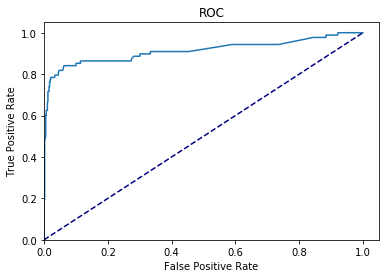

In [58]:
# plot ROC curve
FPR, TPR, THR = roc_curve(Y_test, PProb.Class1)
# plot the FPR as X-axis and TPR as Y-axis
plt.plot(FPR, TPR)
# plot the minimum line 
plt.plot([0,1], [0,1], color='navy', linestyle = '--')
# set X and Y limits
plt.xlim([0.0, 1.05])
plt.ylim([0.0, 1.05])
# mention lables for X and Y
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()

In [59]:
ROC = pd.DataFrame({"THR":THR,
                   "TPR":TPR,
                   "FPR":FPR})
ROC.to_excel('ROC_XGBM.xlsx')

In [62]:
pclass = list()
for prob in PProb.Class1:
    if prob >= 0.2343:
        pclass.append(1)
    else:
        pclass.append(0)
print(PProb.Class1.head())
print(pclass[0:5])

0    0.042164
1    0.024609
2    0.026785
3    0.019006
4    0.933284
Name: Class1, dtype: float32
[0, 0, 0, 0, 1]


In [63]:
print (confusion_matrix(Y_test,pclass))
print (classification_report(Y_test,pclass))

[[543  36]
 [ 14  74]]
              precision    recall  f1-score   support

           0       0.97      0.94      0.96       579
           1       0.67      0.84      0.75        88

    accuracy                           0.93       667
   macro avg       0.82      0.89      0.85       667
weighted avg       0.94      0.93      0.93       667

